Notebook from [Forecast Website Traffic Using Facebook's Prophet Library](http://pbpython.com/prophet-overview.html) 

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

Use ggplot style for ascentic reasons

In [2]:
%matplotlib inline
plt.style.use('ggplot')

Read in the data file and store as a pandas dataframe

In [3]:
data_file = "All Web Site Data Audience Overview.xlsx"
df = pd.read_excel(data_file)
df.head()

,Day Index,Sessions
0,2014-09-25,1
1,2014-09-26,4
2,2014-09-27,8
3,2014-09-28,42
4,2014-09-29,233


Check the data types to make sure the Day Index is a datetime type

In [4]:
df.dtypes

Day Index    datetime64[ns]
Sessions              int64
dtype: object

Do a simple plot

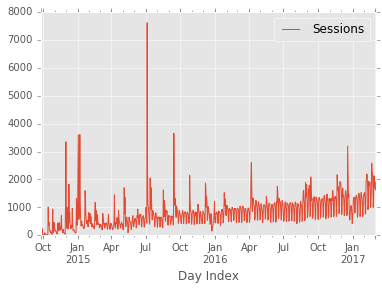

In [5]:
df.set_index('Day Index').plot();

Filter out the outlier traffic spike

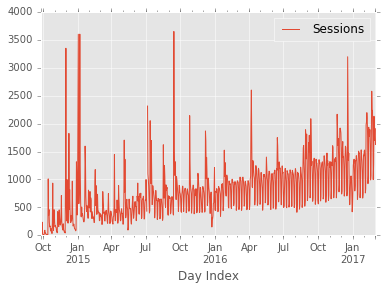

In [6]:
df.loc[(df['Sessions'] > 5000), 'Sessions'] = np.nan
df.set_index('Day Index').plot();

More info on why we use log here - https://people.duke.edu/~rnau/411log.htm

In [7]:
df['Sessions'] = np.log(df['Sessions'])
df.head()

,Day Index,Sessions
0,2014-09-25,0.000000
1,2014-09-26,1.386294
2,2014-09-27,2.079442
3,2014-09-28,3.737670
4,2014-09-29,5.451038


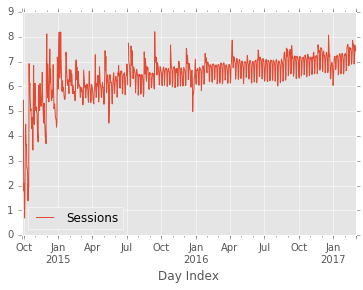

In [8]:
df.set_index('Day Index').plot();

Rename the columns to comply with the prophet API

In [9]:
df.columns = ["ds", "y"]
df.head()

,ds,y
0,2014-09-25,0.000000
1,2014-09-26,1.386294
2,2014-09-27,2.079442
3,2014-09-28,3.737670
4,2014-09-29,5.451038


Create a prophet object and fit it to our data

In [10]:
m1 = Prophet()
m1.fit(df)

Create the future days we want to predict

In [11]:
future1 = m1.make_future_dataframe(periods=365)
future1.tail()

,ds
1250,2018-02-27
1251,2018-02-28
1252,2018-03-01
1253,2018-03-02
1254,2018-03-03


Predict the future!

In [12]:
forecast1 = m1.predict(future1)

Look at the values contained in the forecast dataframe

In [13]:
forecast1.head()

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,2014-09-25,0.000000,3.664253,-0.012358,-0.012358,3.664253,3.664253,3.037351,4.281368,0.184423,0.184423,0.184423,-0.196780,-0.196780,-0.196780,-0.012358,3.651895
1,2014-09-26,0.001124,3.688755,-0.228551,-0.228551,3.688755,3.688755,2.865529,4.086882,0.000932,0.000932,0.000932,-0.229483,-0.229483,-0.229483,-0.228551,3.460204
2,2014-09-27,0.002247,3.713258,-0.780730,-0.780730,3.713258,3.713258,2.328066,3.593121,-0.520686,-0.520686,-0.520686,-0.260044,-0.260044,-0.260044,-0.780730,2.932528
3,2014-09-28,0.003371,3.737760,-0.673173,-0.673173,3.737760,3.737760,2.450601,3.717584,-0.385316,-0.385316,-0.385316,-0.287857,-0.287857,-0.287857,-0.673173,3.064587
4,2014-09-29,0.004494,3.762263,-0.028859,-0.028859,3.762263,3.762263,3.117605,4.311311,0.283490,0.283490,0.283490,-0.312349,-0.312349,-0.312349,-0.028859,3.733404


In [14]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1250,2018-02-27,7.848040,6.654015,9.166710
1251,2018-02-28,7.787314,6.564469,9.083820
1252,2018-03-01,7.755146,6.494767,9.060937
1253,2018-03-02,7.552382,6.346593,8.920342
1254,2018-03-03,7.011651,5.815951,8.377682


In [15]:
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
1250,2560.709477,775.893445,9573.075073
1251,2409.836175,709.434900,8811.561688
1252,2333.549138,661.669726,8612.217253
1253,1905.275686,570.545519,7482.649606
1254,1109.484324,335.610555,4348.916312


Plot the forecast for the next year

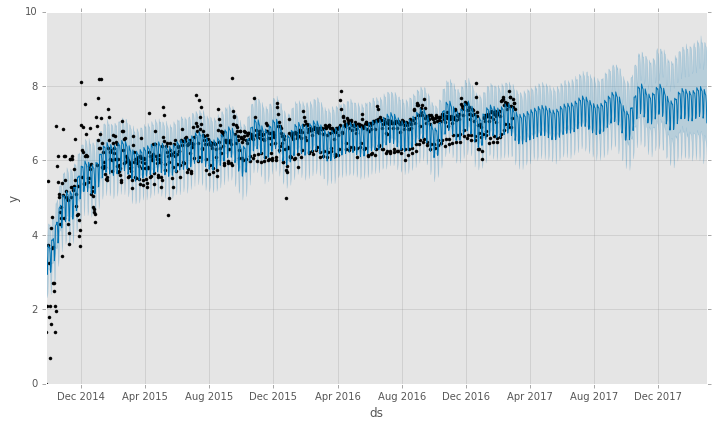

In [16]:
m1.plot(forecast1);

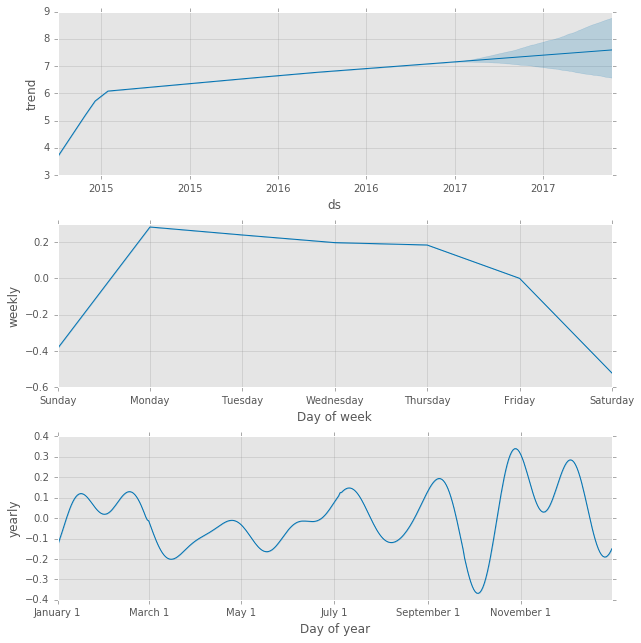

In [17]:
m1.plot_components(forecast1);

Create a dataframe with all the blog posts as well as the new one happening on March 6th, 2017.

In [18]:
articles = pd.DataFrame({
  'holiday': 'publish',
  'ds': pd.to_datetime(['2014-09-27', '2014-10-05', '2014-10-14', '2014-10-26', '2014-11-9', 
                        '2014-11-18', '2014-11-30', '2014-12-17', '2014-12-29', '2015-01-06',
                        '2015-01-20', '2015-02-02', '2015-02-16', '2015-03-23', '2015-04-08',
                        '2015-05-04', '2015-05-17', '2015-06-09', '2015-07-02', '2015-07-13',
                        '2015-08-17', '2015-09-14', '2015-10-26', '2015-12-07', '2015-12-30',
                        '2016-01-26', '2016-04-06', '2016-05-16', '2016-06-15', '2016-08-23',
                        '2016-08-29', '2016-09-06', '2016-11-21', '2016-12-19', '2017-01-17',
                        '2017-02-06', '2017-02-21', '2017-03-06']),
  'lower_window': 0,
  'upper_window': 5,
})

In [19]:
articles.head()

,ds,holiday,lower_window,upper_window
0,2014-09-27,publish,0,5
1,2014-10-05,publish,0,5
2,2014-10-14,publish,0,5
3,2014-10-26,publish,0,5
4,2014-11-09,publish,0,5


Create a new model with the holidays defined

In [20]:
m2 = Prophet(holidays=articles).fit(df)

In [21]:
future2 = m2.make_future_dataframe(periods=90)

In [22]:
forecast2 = m2.predict(future2)

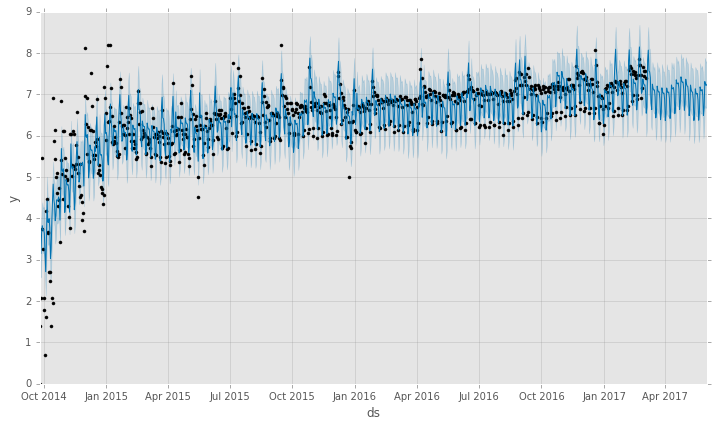

In [23]:
m2.plot(forecast2);

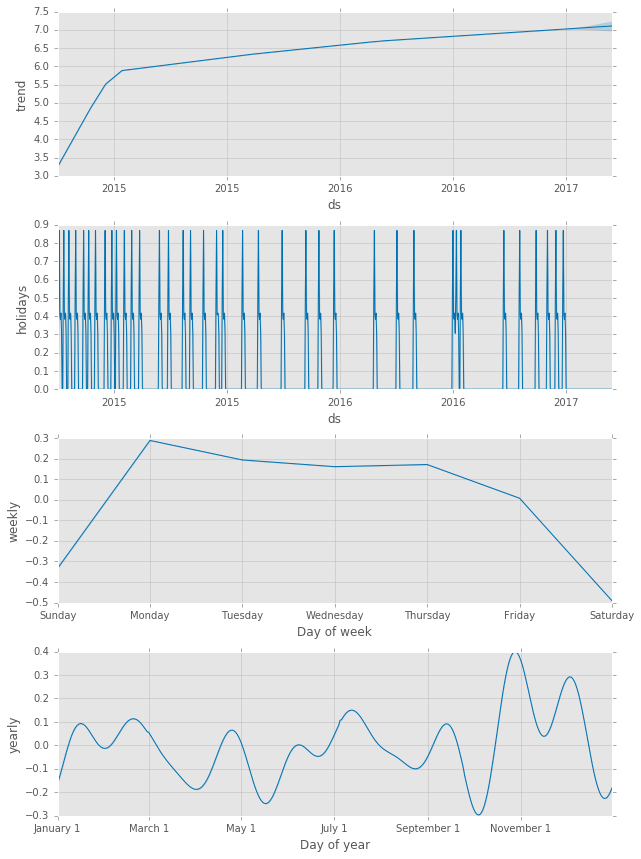

In [24]:
m2.plot_components(forecast2);

Create the final model using holidays and applying some bayesian sampling to handle the errors with the holidays.
This will take a couple of minutes to run.

In [25]:
m3 = Prophet(holidays=articles, mcmc_samples=500).fit(df)
future3 = m3.make_future_dataframe(periods=90)
forecast3 = m3.predict(future3)

Convert the log values back to the "real world" values.

In [26]:
forecast3["Sessions"] = np.exp(forecast3.yhat).round()
forecast3["Sessions_lower"] = np.exp(forecast3.yhat_lower).round()
forecast3["Sessions_upper"] = np.exp(forecast3.yhat_upper).round()
forecast3[(forecast3.ds > "3-5-2017") & 
          (forecast3.ds < "4-1-2017")][["ds", "yhat", "Sessions_lower", "Sessions", "Sessions_upper"]]

,ds,yhat,Sessions_lower,Sessions,Sessions_upper
892,2017-03-06,7.845280,1432.0,2554.0,4449.0
893,2017-03-07,8.087120,1795.0,3252.0,5714.0
894,2017-03-08,7.578796,1142.0,1956.0,3402.0
895,2017-03-09,7.556725,1079.0,1914.0,3367.0
896,2017-03-10,7.415903,917.0,1662.0,2843.0
897,2017-03-11,6.796987,483.0,895.0,1587.0
898,2017-03-12,6.627355,417.0,755.0,1267.0
899,2017-03-13,7.240586,811.0,1395.0,2341.0
900,2017-03-14,7.132906,717.0,1253.0,2204.0
901,2017-03-15,7.095244,702.0,1206.0,2201.0


In [27]:
forecast3.to_excel("March-2017-forecast.xlsx")